In [1]:
import xarray as xr

In [18]:
dataPath = '/Users/xduplm/Google Drive/My Drive/data/bedmachine/BedMachineAntarctica-v3.nc'

ds = xr.open_dataset(dataPath)

Playing with `yx2ll.py`

In [3]:
from netCDF4 import Dataset

from xy2ll import xy2ll

ds = Dataset('/Users/xduplm/Google Drive/My Drive/data/bedmachine/BedMachineAntarctica-v3.nc')
xs = ds.variables['x'][:]
ys = ds.variables['y'][:]

# cast xs and ys as float. `xy2ll` will not return correct results
# otherwise.
xs = xs.astype(float)
ys = ys.astype(float)

lats, lons = xy2ll(
    xs,
    ys,
    -1,  # -1 is a flag indicating the southern hemisphere.
)

        xy2ll: creating coordinates in south polar stereographic (Std Latitude: 71degS Meridian: 0deg)


Seems to work ok

In [24]:
from interp_bedmachine_antarctica import interp_bedmachine_antarctica
import numpy as np

to_x = np.linspace(-1666500.0, 1666500.0, 13332)
to_y = np.linspace(-1666500.0, 1666500.0, 13332)

variable = 'bed'

bedmachine_nc_path = '/Users/xduplm/Google Drive/My Drive/data/bedmachine/BedMachineAntarctica-v3.nc'

interpolated = interp_bedmachine_antarctica(
        to_x,
        to_y,
        variable,
    bedmachine_nc_path=bedmachine_nc_path
)
  

Runs fine, let's see what the output is

In [7]:
import matplotlib.pyplot as plt

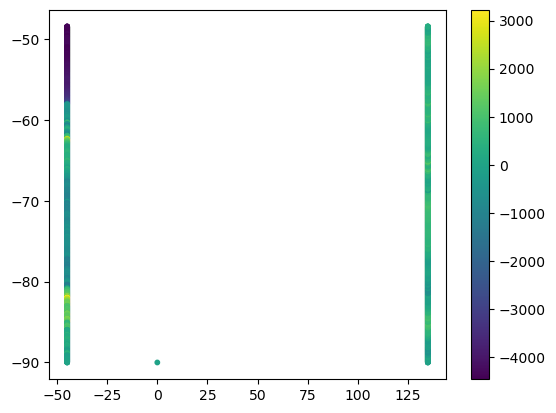

In [29]:
plt.scatter(lons[1:], lats[1:], 10, interpolated)
plt.colorbar()

I don't really know what the output should look like. I was hoping it to be something like a map, but this is clearly not. The example that is in the github page (https://github.com/nsidc/nsidc0756-scripts/) is for a different bedmachine dataset. I wonder if this is why. Hmmmm.